In [15]:
!pip install numpy
!pip install Pillow

In [16]:
# Funtion um ein Bild darzustellen, einfach ignorieren
import PIL.Image
import IPython.display
import numpy as np
def showarray(a):
    IPython.display.display(PIL.Image.fromarray(a))

In [17]:
import numpy as np
import os

# Function to load a PPM-Image (simple image format)
# See for reference: http://netpbm.sourceforge.net/doc/ppm.html
def load_ppm(path):       
    # Open our image file in read only mode ( 'r' )
    file = open(path, 'r')
    # Real all lines in this file. Returns an array of strings
    lines = file.readlines()
    
    # The first three files inside the file contain meta information about the image 
    # First line is the identifier (also called "magic number" in computer science)
    if lines[0].strip() != "P3":
        print("Not a supported PPM format")
        return
    
    # The second line contains the image dimensions
    W = int(lines[1].split(" ")[0])
    H = int(lines[1].split(" ")[1])
    
    print(f"Width: {W}  Height: {H}")
    
    # Our image is an array of pixels (width * height with 3 components per pixel)
    # Since our colordepth is 8 bit, we chose uint8 as our datatype
    # uint8 means a number (integer) without sign (=unsigned) that can contain 2^8 (256) different values
    out = np.empty((H,W,3), dtype=np.uint8)
    # Unser aktueller Pixel-Index (der Pixel in den wir gerade etwas reinladen)
    x_index = 0
    y_index = 0
    component_index = 0
    
    # We use "slicing" notation to ignore the first 3 lines.
    # See https://stackoverflow.com/questions/509211/understanding-slice-notation
    for line in lines[3:]:
        components = line.strip().split(" ")
        for component in components:
            out[y_index,x_index,component_index] = int(component)
            component_index+=1;
            
            # Move to the next pixel
            if component_index%3 == 0:
                x_index += 1
                component_index = 0
            
                # Move to the next row
                if x_index%W == 0:
                    y_index += 1
                    x_index = 0
                    
    return out

# Famous test image https://en.wikipedia.org/wiki/Lenna
img_array = load_ppm("../data/lenna.ppm")
showarray(img_array)

Width: 512  Height: 512


NameError: name 'w_index' is not defined

# Aufgaben
- [x] Lade das Bild um 90° im Uhrzeigersinn rotiert (Tipp: schau dir Indizierung vom NumPy Array an)
- [x] Wie könnte man die Daten effizienter speichern? Lies dir in der Spezifikation (http://netpbm.sourceforge.net/doc/ppm.html) den Abschnitt zu P6 durch.
- [x] Was machen die Befehle split() & strip() in Python?


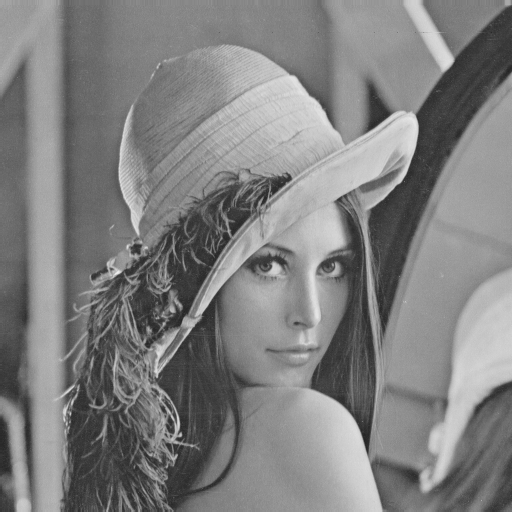

In [14]:
def to_grayscale(img):
    out = np.copy(img)
    for y in range(out.shape[0]):
        for x in range(out.shape[1]):
            out[y,x] = np.average(out[y,x])

    return out
    
showarray(to_grayscale(img_array))

# Aufgaben
- [x] Implementiere die Funtkion **to_grayscale** die das Bild in Schwarz-Weiß darstellt (Tipp: damit ein Farbwert "grau" ist müssen alle Komponenten den selben Wert haben
- [x] Finde heraus wie die einzelnen Komponenten gewichtet werden sollen: https://www.dynamsoft.com/blog/insights/image-processing/image-processing-101-color-space-conversion/
- [x] Pass auf dass du eine Kopie erstellst, also nicht die Eingangsdaten in der Funktion veränderst
